# Sharpe Ratio and Portfolio Values

## Create a Portfolio

In [5]:
import os
os.environ["HTTP_PROXY"] = "http://atlasproxy.isbank"
os.environ["HTTPS_PROXY"] = "http://atlasproxy.isbank"

In [6]:
%env

{'ALLUSERSPROFILE': 'C:\\ProgramData',
 'APPDATA': 'C:\\Users\\IS96347\\AppData\\Roaming',
 'CLASSPATH': '.;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2java.zip;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2jcc.jar;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\sqlj.zip;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\db2jcc_license_cu.jar;C:\\PROGRA~2\\IBM\\SQLLIB\\bin;C:\\PROGRA~2\\IBM\\SQLLIB\\java\\common.jar;C:\\IBM\\RationalSDLC\\ClearQuest\\cqjni.jar',
 'CLEARQUEST_HOME': 'C:\\IBM\\RationalSDLC\\ClearQuest',
 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
 'COMPUTERNAME': 'T2LPRVT890',
 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe',
 'CONDA_DEFAULT_ENV': 'pyfinance',
 'CONDA_EXE': 'C:\\Users\\IS96347\\AppData\\Local\\Continuum\\anaconda3\\Scripts\\conda.exe',
 'CONDA_PREFIX': 'C:\\Users\\IS96347\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyfinance',
 'CONDA_PROMPT_MODIFIER': '(pyfinance) ',


In [7]:
import pandas as pd
import quandl

In [8]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [9]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

ProxyError: HTTPSConnectionPool(host='www.quandl.com', port=443): Max retries exceeded with url: /api/v3/datasets/WIKI/AAPL/data?order=asc&start_date=2012-01-01+00%3A00%3A00&end_date=2017-01-01+00%3A00%3A00&column_index=11 (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 501 Not Implemented',)))

In [12]:
aapl = pd.read_csv("../09-Python-Finance-Fundamentals/AAPL_CLOSE", index_col="Date", parse_dates=True)
cisco = pd.read_csv("../09-Python-Finance-Fundamentals/CISCO_CLOSE", index_col="Date", parse_dates=True)
ibm = pd.read_csv("../09-Python-Finance-Fundamentals/IBM_CLOSE", index_col="Date", parse_dates=True)
amzn = pd.read_csv("../09-Python-Finance-Fundamentals/AMZN_CLOSE", index_col="Date", parse_dates=True)

In [13]:
aapl.head()

,Adj. Close
Date,
2012-01-03,53.063218
2012-01-04,53.348386
2012-01-05,53.940658
2012-01-06,54.504543
2012-01-09,54.418089


## Normalize Prices

In [14]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [15]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,53.063218,1.000000
2012-01-04,53.348386,1.005374
2012-01-05,53.940658,1.016536
2012-01-06,54.504543,1.027162
2012-01-09,54.418089,1.025533


In [16]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.547742,2.177549
2016-12-27,116.281568,2.191378
2016-12-28,115.785740,2.182034
2016-12-29,115.755990,2.181473
2016-12-30,114.853583,2.164467


## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [18]:
list(zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]))

[(            Adj. Close  Normed Return
  Date                                 
  2012-01-03   53.063218       1.000000
  2012-01-04   53.348386       1.005374
  2012-01-05   53.940658       1.016536
  2012-01-06   54.504543       1.027162
  2012-01-09   54.418089       1.025533
  2012-01-10   54.612933       1.029205
  2012-01-11   54.523898       1.027527
  2012-01-12   54.374217       1.024706
  2012-01-13   54.170341       1.020864
  2012-01-17   54.801324       1.032755
  2012-01-18   55.370370       1.043479
  2012-01-19   55.194882       1.040172
  2012-01-20   54.233569       1.022056
  2012-01-23   55.150881       1.039343
  2012-01-24   54.247763       1.022323
  2012-01-25   57.634941       1.086156
  2012-01-26   57.372999       1.081220
  2012-01-27   57.714943       1.087664
  2012-01-30   58.454316       1.101598
  2012-01-31   58.902069       1.110036
  2012-02-01   58.864648       1.109331
  2012-02-02   58.726580       1.106729
  2012-02-03   59.314982       1.117817


In [19]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [20]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,53.063218,1.000000,0.300000
2012-01-04,53.348386,1.005374,0.301612
2012-01-05,53.940658,1.016536,0.304961
2012-01-06,54.504543,1.027162,0.308149
2012-01-09,54.418089,1.025533,0.307660


## Investment

In [21]:
# 1 milyon dolar yatırım yaptığımızı varsayalım
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [22]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,53.063218,1.000000,0.300000,300000.000000
2012-01-04,53.348386,1.005374,0.301612,301612.236461
2012-01-05,53.940658,1.016536,0.304961,304960.727573
2012-01-06,54.504543,1.027162,0.308149,308148.724558
2012-01-09,54.418089,1.025533,0.307660,307659.946988


In [25]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']], axis=1)

In [26]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [27]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [28]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

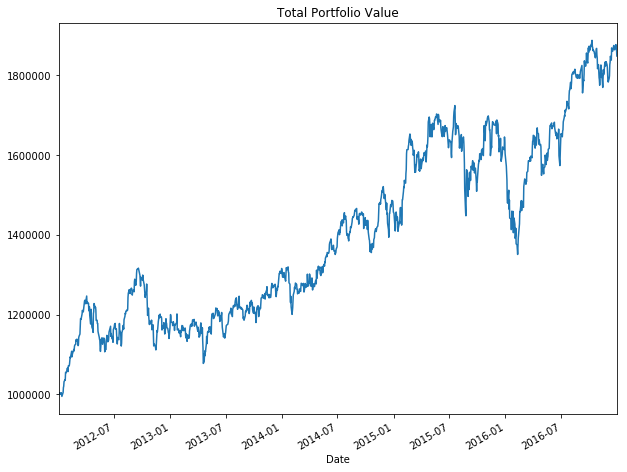

In [30]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

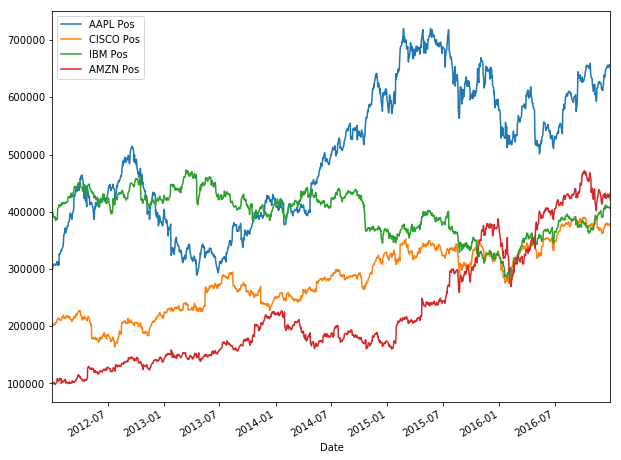

In [34]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8))

## Portfolio Statistics

**Daily Returns**

In [35]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [43]:
portfolio_val["Daily Return"] = portfolio_val["Total Pos"].pct_change(1)

In [45]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


**Cumulative Return**

In [46]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 84.74285181665459 was percent!


**Avg Daily Return**

In [38]:
portfolio_val["Daily Return"].mean()

0.00054423307162152791

**Std Daily Return**

In [48]:
portfolio_val['Daily Return'].std()

0.010568287769162552

**Plot**

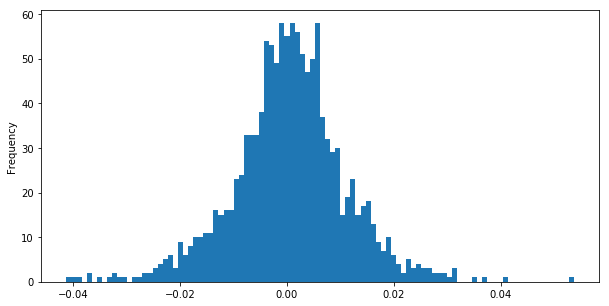

In [41]:
portfolio_val["Daily Return"].plot(kind="hist", bins=100, figsize=(10,5))

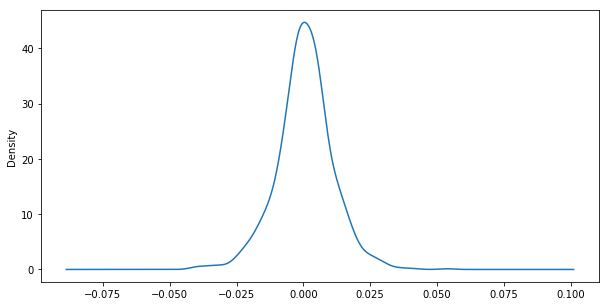

In [42]:
portfolio_val["Daily Return"].plot(kind="kde", figsize=(10,5))

## Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [49]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()
SR

0.051496806626477189

In [50]:
ASR = (252**0.5)*SR
ASR

0.81748646188585039